## Lesson 5

Aluno: Sebastián Héctor Zuzunaga Rosado

Matricula: 211006957

## Objetivo

O conhecimento adquirido neste capítulo será usado para criar um modelo tabular a partir do zero, cujo propósito será prever o nível de aceitabilidade de um automóvel, dependendo de vários fatores.

## Set up and imports

Inicializa-se o notebook para correr no Kaggle e se cria o path levando ao dataset que será usado depois, também se realizam os Imports necessários para fazer o teste split e calcular o f1 score.

In [61]:
from pathlib import Path
import os
os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
path = Path('../input/car-acceptability-classification-dataset/car.csv')
!pip install -Uqq fastai

In [62]:
from fastai.tabular.all import *
pd.options.display.float_format = '{:.2f}'.format
set_seed(42)

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Prep the data

Para poder usar o dataset vai ler-se no endereço do Path que já foi especificado.

In [65]:
df = pd.read_csv(path)
df

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


Para facilitar a identificação das previsões, os resultados possíveis são alterados por números: unacc = 0, acc = 1, good = 2, vgood = 3.

In [66]:
df['Car_Acceptability'].replace({'unacc':0,'acc':1,'good':2,'vgood':3},inplace = True)

In [67]:
df

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
0,vhigh,vhigh,2,2,small,low,0
1,vhigh,vhigh,2,2,small,med,0
2,vhigh,vhigh,2,2,small,high,0
3,vhigh,vhigh,2,2,med,low,0
4,vhigh,vhigh,2,2,med,med,0
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,2
1724,low,low,5more,more,med,high,3
1725,low,low,5more,more,big,low,0
1726,low,low,5more,more,big,med,2


Vai-se realizar uma contagem de qual é a distribuição da data, se vê que a grande maioria pertence a unacc, devido a isto a métrica de accurancy não será util.

In [68]:
df.Car_Acceptability.value_counts()

0    1210
1     384
2      69
3      65
Name: Car_Acceptability, dtype: int64

É criado o conjunto de treinamento e validação, sendo este aleatório leva em conta a distribuição.

In [69]:
splits = RandomSplitter(seed=42)(df)

O framework do Pandas será usado para agilizar a limpeza dos dados, o framework do Pandas lida automaticamente com a data normalization e a criação de variáveis dummies.

In [70]:
dls = TabularPandas(
    df, splits=splits,
    procs = [Categorify, FillMissing, Normalize],
    cat_names=["Buying_Price","Maintenance_Price","No_of_Doors","Person_Capacity","Size_of_Luggage","Safety"],
    cont_names=[],
    y_names="Car_Acceptability", y_block = CategoryBlock(),
).dataloaders(path=".")

/opt/conda/lib/python3.10/site-packages/fastai/tabular/core.py:279: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  to.conts = (to.conts-self.means) / self.stds


## Train the model

Vamos usar o slider para identificar um learning rate adequado, se este for muito pequeno ou muito grande as previsões não serão adequadas e a loss terá um grande tamanho.

In [71]:
learn = tabular_learner(dls, metrics=accuracy, layers=[10,10])

SuggestedLRs(slide=0.033113110810518265, valley=0.005248074419796467)

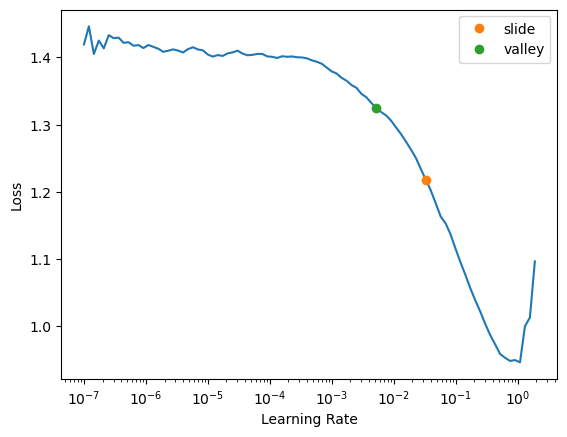

In [72]:
learn.lr_find(suggest_funcs=(slide, valley))

In [73]:
learn.fit(16, lr=0.018)

epoch,train_loss,valid_loss,accuracy,time
0,0.744706,0.583415,0.736232,00:00
1,0.509551,0.279482,0.866667,00:00
2,0.377357,0.167603,0.939130,00:00
3,0.292509,0.158995,0.933333,00:00
4,0.241139,0.090520,0.982609,00:00
5,0.201962,0.074009,0.979710,00:00
6,0.173971,0.100043,0.968116,00:00
7,0.150542,0.122409,0.942029,00:00
8,0.154965,0.075240,0.976812,00:00
9,0.146900,0.205769,0.930435,00:00


## Create test set

O teste splitter é usado para criar um teste set para fazer predições.

In [74]:
tst_df1 = train_test_split(df, shuffle=True)

tst_df1 contém o dataset original e o teste set.

In [75]:
tst_df1

[     Buying_Price Maintenance_Price No_of_Doors Person_Capacity  \
 1036          med              high           4               4   
 757          high               low           2               2   
 589          high              high           3            more   
 907           med             vhigh           3               4   
 1159          med               med           4            more   
 ...           ...               ...         ...             ...   
 1130          med               med           3            more   
 1294          med               low       5more            more   
 860          high               low       5more            more   
 1459          low              high           4               2   
 1126          med               med           3            more   
 
      Size_of_Luggage Safety  Car_Acceptability  
 1036           small    med                  0  
 757            small    med                  0  
 589              med    med    

In [76]:
tst_df1[1]

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
599,high,high,4,2,med,high,0
1201,med,low,2,4,med,med,1
628,high,high,5more,2,big,med,0
1498,low,high,5more,4,med,med,1
1263,med,low,4,more,med,low,0
...,...,...,...,...,...,...,...
1246,med,low,4,2,med,med,0
619,high,high,4,more,big,med,1
1074,med,high,5more,more,med,low,0
1235,med,low,3,more,small,high,2


## Predictions

As previsões são feitas com tst_df[1] já que aqui é onde está o teste set.

In [77]:
tst_dl = learn.dls.test_dl(tst_df1[1])

/opt/conda/lib/python3.10/site-packages/fastai/tabular/core.py:279: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  to.conts = (to.conts-self.means) / self.stds


In [78]:
preds,targs = learn.get_preds(dl=tst_dl,with_targs=True)

Aqui você tem a probabilidade de cada categoria.

In [79]:
preds

tensor([[9.9922e-01, 6.7195e-04, 1.4911e-05, 9.5905e-05],
        [2.1518e-03, 7.8446e-01, 2.1307e-01, 3.2315e-04],
        [9.7020e-01, 2.9358e-02, 1.2183e-04, 3.1512e-04],
        ...,
        [9.9981e-01, 1.2563e-04, 6.6951e-05, 2.3219e-06],
        [1.1616e-01, 6.1210e-02, 7.9613e-01, 2.6504e-02],
        [9.8913e-01, 1.0049e-02, 1.0240e-05, 8.1467e-04]])

Aqui temos as categorias com maior probabilidade.

In [80]:
targs

tensor([[0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [3],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [2],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [3],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [2],
        [0],
        [1],
        [0],
        [0],
        [1],
        [3],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [3],
        [0],

## Predictions with ensembling

Ensembling consiste em treinar 5 modelos que começam a partir de um ponto aleatório e, em seguida, calcular a média de suas previsões, isso em teoria gera uma previsão muito mais exata.

In [81]:
def ensemble():
    learn = tabular_learner(dls, metrics=accuracy, layers=[10,10])
    with learn.no_bar(),learn.no_logging(): learn.fit(16, lr=0.0018)
    return learn.get_preds(dl=tst_dl)[0]

In [82]:
learns = [ensemble() for _ in range(5)]

In [83]:
ens_preds = torch.stack(learns).mean(0)

In [84]:
ens_preds

tensor([[0.9882, 0.0026, 0.0036, 0.0055],
        [0.0543, 0.7283, 0.1729, 0.0445],
        [0.9858, 0.0032, 0.0049, 0.0062],
        ...,
        [0.9847, 0.0066, 0.0039, 0.0048],
        [0.0365, 0.2090, 0.5984, 0.1561],
        [0.9872, 0.0053, 0.0031, 0.0045]])

## F1 score

Agora se passa a calcular o F1 score, devido à distribuição a métrica de accurancy não será útil, pelo que se utilizará esta.
Este tem diferentes valores para average, o que muda como será calculado.
* micro: Calcula F1 score globalmente usando o total de verdadeiros positivos, falsos negativos e falsos positivos.
* macro: Calcula a métrica para cada categoria e tire a média destas.
* weighted: Calcula a métrica para cada categoria e tira a média com peso (o peso será o número de instâncias verdadeiras de cada categoria).

In [85]:
f1_1 = f1_score(tst_df1[1]['Car_Acceptability'],targs, average = 'micro')
f1_1

1.0

In [86]:
f1_2 = f1_score(tst_df1[1]['Car_Acceptability'],targs, average = 'macro')
f1_2

1.0

In [87]:
f1_3 = f1_score(tst_df1[1]['Car_Acceptability'],targs, average = 'weighted')
f1_3

1.0

## Conclusão

Embora algumas coisas tenham sido um pouco confusas, este capítulo do curso me ajudou a entender um pouco melhor como os modelos de previsão funcionam e como usar modelos de dados tabulares.